In [30]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import math

%matplotlib inline

## Visualization method

In [61]:
def visualize_trajectory(trajectory):
    # Unpack X Y Z each trajectory point
    locX = []
    locY = []
    locZ = []
    # This values are required for keeping equal scale on each plot.
    # matplotlib equal axis may be somewhat confusing in some situations because of its various scale on
    # different axis on multiple plots
    max = -math.inf
    min = math.inf

    # Needed for better visualisation
    maxY = -math.inf
    minY = math.inf

    for i in range(0, trajectory.shape[1]):
        current_pos = trajectory[:, i]
        
        locX.append(current_pos.item(0))
        locY.append(current_pos.item(1))
        locZ.append(current_pos.item(2))
        if np.amax(current_pos) > max:
            max = np.amax(current_pos)
        if np.amin(current_pos) < min:
            min = np.amin(current_pos)

        if current_pos.item(1) > maxY:
            maxY = current_pos.item(1)
        if current_pos.item(1) < minY:
            minY = current_pos.item(1)

    auxY_line = locY[0] + locY[-1]
    if max > 0 and min > 0:
        minY = auxY_line - (max - min) / 2
        maxY = auxY_line + (max - min) / 2
    elif max < 0 and min < 0:
        minY = auxY_line + (min - max) / 2
        maxY = auxY_line - (min - max) / 2
    else:
        minY = auxY_line - (max - min) / 2
        maxY = auxY_line + (max - min) / 2

    # Set styles
    mpl.rc("figure", facecolor="white")
    plt.style.use("seaborn-whitegrid")

    # Plot the figure
    fig = plt.figure(figsize=(8, 6), dpi=100)
    gspec = gridspec.GridSpec(3, 3)
    ZY_plt = plt.subplot(gspec[0, 1:])
    YX_plt = plt.subplot(gspec[1:, 0])
    traj_main_plt = plt.subplot(gspec[1:, 1:])
    D3_plt = plt.subplot(gspec[0, 0], projection='3d')

    # Actual trajectory plotting ZX
    toffset = 0.0
    traj_main_plt.set_title("Autonomous vehicle trajectory (Z, X)", y=toffset)
    traj_main_plt.set_title("Trajectory (Z, X)", y=1)
    traj_main_plt.plot(locZ, locX, ".-", label="Trajectory", zorder=1, linewidth=1, markersize=4)
    traj_main_plt.set_xlabel("Z")
    # traj_main_plt.axes.yaxis.set_ticklabels([])
    # Plot reference lines
    traj_main_plt.plot([locZ[0], locZ[-1]], [locX[0], locX[-1]], "--", label="Auxiliary line", zorder=0, linewidth=1)
    # Plot camera initial location
    traj_main_plt.scatter([0], [0], s=8, c="red", label="Start location", zorder=2)
    traj_main_plt.set_xlim([min, max])
    traj_main_plt.set_ylim([min, max])
    traj_main_plt.legend(loc=1, title="Legend", borderaxespad=0., fontsize="medium", frameon=True)

    # Plot ZY
    # ZY_plt.set_title("Z Y", y=toffset)
    ZY_plt.set_ylabel("Y", labelpad=-4)
    ZY_plt.axes.xaxis.set_ticklabels([])
    ZY_plt.plot(locZ, locY, ".-", linewidth=1, markersize=4, zorder=0)
    ZY_plt.plot([locZ[0], locZ[-1]], [(locY[0] + locY[-1]) / 2, (locY[0] + locY[-1]) / 2], "--", linewidth=1, zorder=1)
    ZY_plt.scatter([0], [0], s=8, c="red", label="Start location", zorder=2)
    ZY_plt.set_xlim([min, max])
    ZY_plt.set_ylim([minY, maxY])

    # Plot YX
    # YX_plt.set_title("Y X", y=toffset)
    YX_plt.set_ylabel("X")
    YX_plt.set_xlabel("Y")
    YX_plt.plot(locY, locX, ".-", linewidth=1, markersize=4, zorder=0)
    YX_plt.plot([(locY[0] + locY[-1]) / 2, (locY[0] + locY[-1]) / 2], [locX[0], locX[-1]], "--", linewidth=1, zorder=1)
    YX_plt.scatter([0], [0], s=8, c="red", label="Start location", zorder=2)
    YX_plt.set_xlim([minY, maxY])
    YX_plt.set_ylim([min, max])

    # Plot 3D
    D3_plt.set_title("3D trajectory", y=toffset)
    D3_plt.plot3D(locX, locZ, locY, zorder=0)
    D3_plt.scatter(0, 0, 0, s=8, c="red", zorder=1)
    D3_plt.set_xlim3d(min, max)
    D3_plt.set_ylim3d(min, max)
    D3_plt.set_zlim3d(min, max)
    D3_plt.tick_params(direction='out', pad=-2)
    D3_plt.set_xlabel("X", labelpad=0)
    D3_plt.set_ylabel("Z", labelpad=0)
    D3_plt.set_zlabel("Y", labelpad=-2)
    
    # plt.axis('equal')
    D3_plt.view_init(45, azim=30)
    plt.tight_layout()
    plt.show()

## Loading the dataframe

In [78]:
df = pd.read_csv('data/ground_truth/gt_3.csv')

In [79]:
df.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.child_frame_id,field.pose.pose.position.x,field.pose.pose.position.y,field.pose.pose.position.z,field.pose.pose.orientation.x,field.pose.pose.orientation.y,...,field.twist.covariance26,field.twist.covariance27,field.twist.covariance28,field.twist.covariance29,field.twist.covariance30,field.twist.covariance31,field.twist.covariance32,field.twist.covariance33,field.twist.covariance34,field.twist.covariance35
0,2767642000000,0,2767630000000,map,base_link,-2.603236e-10,-0.000002,3.753704e-07,0.000006,-7.521060e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2767666000000,1,2767666000000,map,base_link,-2.601802e-10,-0.000002,3.771091e-07,0.000006,-7.515131e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2767702000000,2,2767702000000,map,base_link,-2.593696e-10,-0.000002,3.788460e-07,0.000006,-7.486740e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2767738000000,3,2767738000000,map,base_link,-2.599307e-10,-0.000002,3.805798e-07,0.000006,-7.504534e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2767774000000,4,2767774000000,map,base_link,-2.724404e-10,-0.000002,3.822936e-07,0.000006,-7.924577e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df = df.drop(columns=['%time', 'field.header.seq'])
df.head()

,field.header.stamp,field.header.frame_id,field.child_frame_id,field.pose.pose.position.x,field.pose.pose.position.y,field.pose.pose.position.z,field.pose.pose.orientation.x,field.pose.pose.orientation.y,field.pose.pose.orientation.z,field.pose.pose.orientation.w,...,field.twist.covariance26,field.twist.covariance27,field.twist.covariance28,field.twist.covariance29,field.twist.covariance30,field.twist.covariance31,field.twist.covariance32,field.twist.covariance33,field.twist.covariance34,field.twist.covariance35
0,2767630000000,map,base_link,-2.603236e-10,-0.000002,3.753704e-07,0.000006,-7.521060e-10,-8.419960e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2767666000000,map,base_link,-2.601802e-10,-0.000002,3.771091e-07,0.000006,-7.515131e-10,-8.424269e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2767702000000,map,base_link,-2.593696e-10,-0.000002,3.788460e-07,0.000006,-7.486740e-10,-8.428573e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2767738000000,map,base_link,-2.599307e-10,-0.000002,3.805798e-07,0.000006,-7.504534e-10,-8.432878e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2767774000000,map,base_link,-2.724404e-10,-0.000002,3.822936e-07,0.000006,-7.924577e-10,-8.437597e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
pos_features = ['field.pose.pose.position.x', 'field.pose.pose.position.y', 'field.pose.pose.position.z']
orientation_features = ['field.pose.pose.orientation.x', 'field.pose.pose.orientation.y', 
                       'field.pose.pose.orientation.z', 'field.pose.pose.orientation.w']

In [82]:
position = df[pos_features]
position.head()

,field.pose.pose.position.x,field.pose.pose.position.y,field.pose.pose.position.z
0,-2.603236e-10,-0.000002,3.753704e-07
1,-2.601802e-10,-0.000002,3.771091e-07
2,-2.593696e-10,-0.000002,3.788460e-07
3,-2.599307e-10,-0.000002,3.805798e-07
4,-2.724404e-10,-0.000002,3.822936e-07


In [83]:
orientation = df[orientation_features]
orientation.head()

,field.pose.pose.orientation.x,field.pose.pose.orientation.y,field.pose.pose.orientation.z,field.pose.pose.orientation.w
0,0.000006,-7.521060e-10,-8.419960e-12,1.0
1,0.000006,-7.515131e-10,-8.424269e-12,1.0
2,0.000006,-7.486740e-10,-8.428573e-12,1.0
3,0.000006,-7.504534e-10,-8.432878e-12,1.0
4,0.000006,-7.924577e-10,-8.437597e-12,1.0


In [84]:
list_of_pos = position.values.tolist()
list_of_pos = np.array(list_of_pos).T

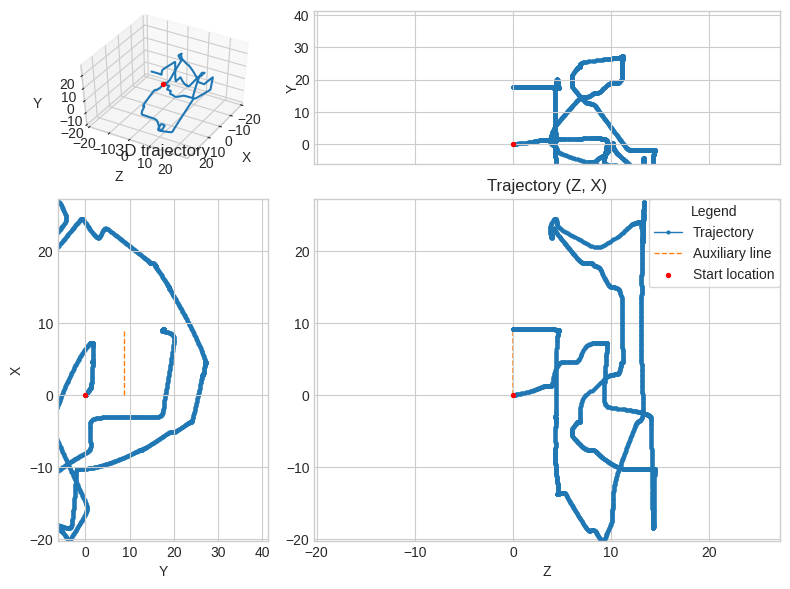

In [85]:
visualize_trajectory(list_of_pos)